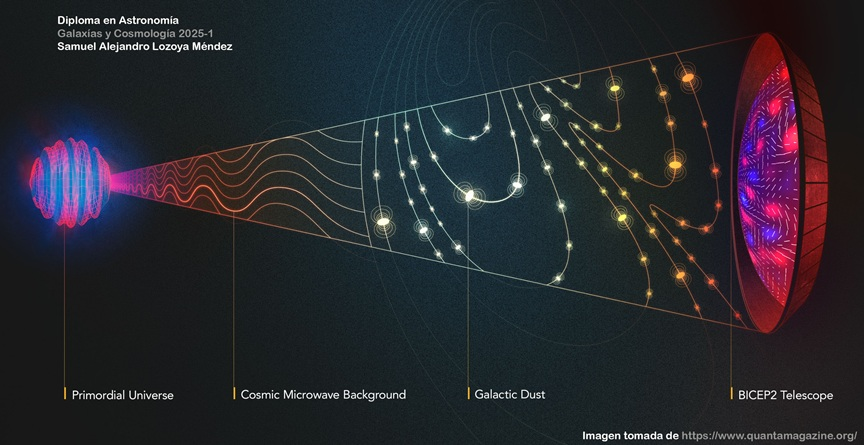

<a target="_blank" href="https://colab.research.google/github.com/Kha0tiko/astronomy/blob/main/Reto2_Samuel_Lozoya.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Reto ñoño 2 - La distribución de los cúmulos globulares

### Datos de entrada


In [123]:
# Librerías a usar
import openpyxl, math
from tabulate import tabulate
import matplotlib.pyplot as plt

# Importar base de datos desde el archivo .xlsx
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path='/content/drive/MyDrive/Colab Notebooks/The_catalogue_of_Globular_Clusters.xlsx'
excel_sheet = openpyxl.load_workbook(path)
database = excel_sheet.active

nombres_columnas = ["ID", "RAJ2000 (h:m:s)", "DEJ2000 (d:m:s)", "X", "Y", "Z"]
tabla = []

for row in range(1,database.max_row):
    lista = [row,]
    for col in database.iter_cols(2,database.max_column):
        lista.append(col[row].value)
    tabla.append(lista)

# Mostrar tabla con los datos de todos los cúmulos
print(tabulate(tabla, headers=nombres_columnas, tablefmt='fancy_grid'))

Mounted at /content/drive
╒═════╤═══════════╤═══════════════════╤═══════════════════╤═══════╤═══════╤═══════╕
│     │ ID        │ RAJ2000 (h:m:s)   │ DEJ2000 (d:m:s)   │     X │     Y │     Z │
╞═════╪═══════════╪═══════════════════╪═══════════════════╪═══════╪═══════╪═══════╡
│   1 │ NGC 104   │ 00 24 05.200      │ -72 04 51.00      │   1.8 │  -2.5 │  -3   │
├─────┼───────────┼───────────────────┼───────────────────┼───────┼───────┼───────┤
│   2 │ NGC 288   │ 00 52 47.500      │ -26 35 24.00      │  -0.1 │   0   │  -8.1 │
├─────┼───────────┼───────────────────┼───────────────────┼───────┼───────┼───────┤
│   3 │ NGC 362   │ 01 03 14.300      │ -70 50 54.00      │   3   │  -4.9 │  -6   │
├─────┼───────────┼───────────────────┼───────────────────┼───────┼───────┼───────┤
│   4 │ NGC 1261  │ 03 12 15.300      │ -55 13 01.00      │   0.1 │  -9.8 │ -12.6 │
├─────┼───────────┼───────────────────┼───────────────────┼───────┼───────┼───────┤
│   5 │ Pal 1     │ 03 33 23.000      │ +79 34 50.

### Definiciones

In [124]:
# Creación de listas para gráfico 3d
valores_x = []
valores_y = []
valores_z = []

### Funciones

In [125]:
# Ciclo para llenado de valores de coordenadas
for row in range(0,database.max_row-1):
    # Obtención de valores de X
    x = tabla[row][4]
    valores_x.append(x)

    # Obtención de valores de Y
    y = tabla[row][5]
    valores_y.append(y)

    # Obtención de valores de Z
    z = tabla[row][6]
    valores_z.append(z)

# Cálculo de posición promedio de los cúmulos
# Promedio de las X
suma = 0
for i in range(0,database.max_row-1):
    a = float(tabla[i][4])
    suma += a
promedio_x = suma/(i+1)

# Promedio de las Y
suma = 0
for i in range(0,database.max_row-1):
    a = float(tabla[i][5])
    suma += a
promedio_y = suma/(i+1)

# Promedio de las Z
suma = 0
for i in range(0,database.max_row-1):
    a = float(tabla[i][6])
    suma += a
promedio_z = suma/(i+1)

# Cálculo de la distancia desde el sol hasta el centro (promedio) de los cúmulos
distancia_Sol_centro = math.sqrt((promedio_x**2)+(promedio_y**2)+(promedio_z**2))

### Resultados

--------------------------------------------------
Posición promedio de los cúmulos en X(kpc):  6.3648
--------------------------------------------------
Posición promedio de los cúmulos en Y(kpc):  -1.2566
--------------------------------------------------
Posición promedio de los cúmulos en Z(kpc):  1.0476
--------------------------------------------------
Distancia Sol - promedio cúmulos(kpc):  6.5717
--------------------------------------------------


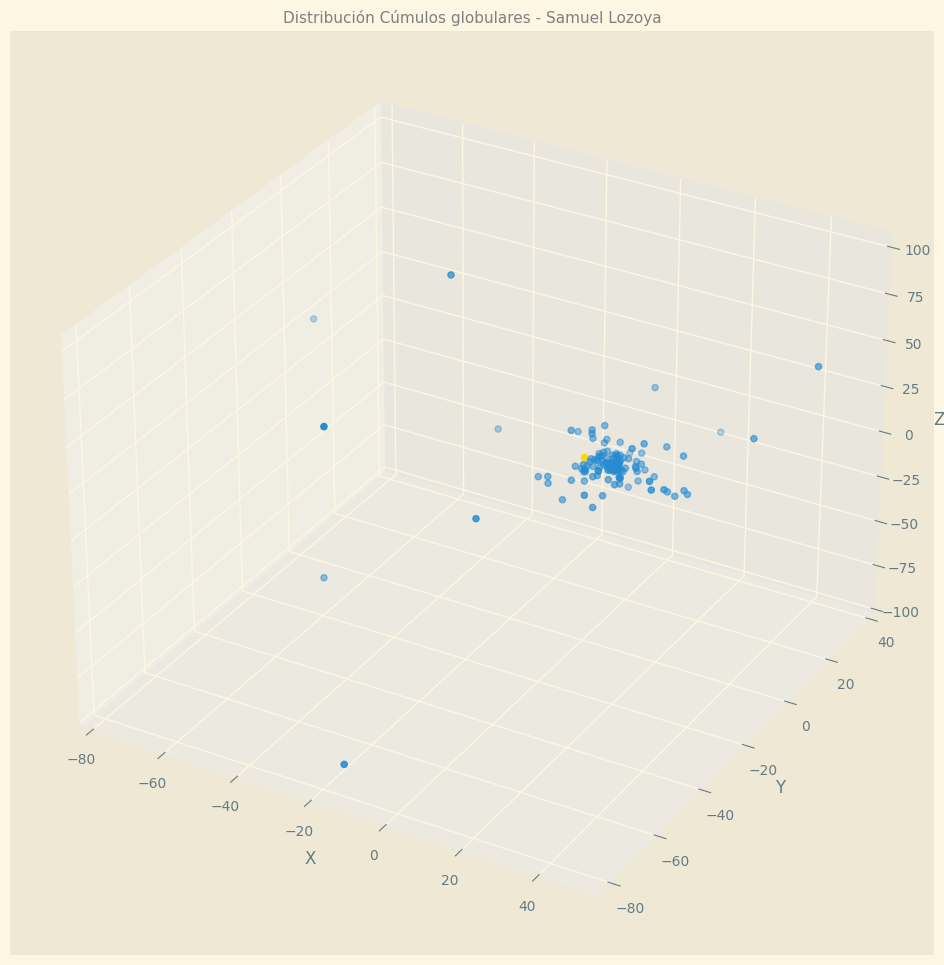

In [126]:
# Imprimir promedios en X, Y y Z
print("--------------------------------------------------")
print("Posición promedio de los cúmulos en X(kpc): ", "{0:.4f}".format(promedio_x))

print("--------------------------------------------------")
print("Posición promedio de los cúmulos en Y(kpc): ", "{0:.4f}".format(promedio_y))

print("--------------------------------------------------")
print("Posición promedio de los cúmulos en Z(kpc): ", "{0:.4f}".format(promedio_z))

# Imprimir distancia calculada
print("--------------------------------------------------")
print("Distancia Sol - promedio cúmulos(kpc): ", "{0:.4f}".format(distancia_Sol_centro))
print("--------------------------------------------------")

# Configuración de gráfica
plt.style.use("Solarize_Light2")
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0, color='gold')
ax.scatter(valores_x, valores_y, valores_z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribución Cúmulos globulares - Samuel Lozoya', fontsize=11, color = "gray")
ax.grid(True)
plt.show()

